In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.util.systems import LowRankRNN
from dsn.train_dsn import train_dsn
from dsn.util.plot_util import assess_constraints, pairplot
import warnings
import scipy
import time
warnings.filterwarnings("ignore")


/Users/sbittner/anaconda/envs/dsn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)
/Users/sbittner/anaconda/envs/dsn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# set fixed params
fixed_params = {'betam':0.6, 'betan':1.0}

# set behavior
behavior_type = 'CDD'
means = np.array([1.0, 0.0]);
variances = np.array([0.01, 0.0]);
behavior = {'type':behavior_type, \
            'means':means, \
            'variances':variances}

# set model options
model_opts = {'rank':2, 'input_type':'input'}

solve_its = 25
solve_eps = 0.8

system = LowRankRNN(fixed_params, behavior, model_opts=model_opts, \
                    solve_its=solve_its, solve_eps=solve_eps)
print(system.free_params)
print(system.T_x_labels)

['g', 'rhom', 'rhon', 'gammaLO', 'gammaHI']
['$z_1$', '$z_2$', '$z_3$', '$z_4$', '$(\\Delta_T)$', '$z_1^2$', '$z_2^2$', '$z_3^2$', '$z_4^2$', '$(\\Delta_T)^2$']


In [3]:
sample_str = 'grid';
num_params = 5
if (sample_str == 'grid'):
    # create test parameter grid
    bound = 3.0
    start = 0.0;
    stop = bound;
    res = 0.5
    eps = .001*res;
    vals = np.arange(start, stop+eps, res);
    num_pts = vals.shape[0];
    vals2 = np.arange(-1, 1+eps, 2.0/num_pts);
    

    total_pts = num_pts**num_params;
    params = np.zeros((total_pts,num_params));
    ind = 0;
    for i in range(num_pts):
        g = vals[i]/3.0
        for j in range(num_pts):
            rhom = vals[j];
            for k in range(num_pts):
                rhon = vals[k]
                for l in range(num_pts):
                    gammaLO = vals2[l]
                    for ii in range(num_pts):
                        gammaHI = vals2[ii]
                        params[ind, :] = np.array([g, rhom, rhon, gammaLO, gammaHI])
                        ind += 1;
                        
                        
                        

In [4]:
Z = tf.placeholder(dtype=tf.float64, shape=(1,None,num_params))
_Z = np.expand_dims(params, 0)
T_x = system.compute_suff_stats(Z)

In [5]:
sess = tf.Session()

In [6]:
_T_x = sess.run(T_x, {Z:_Z})

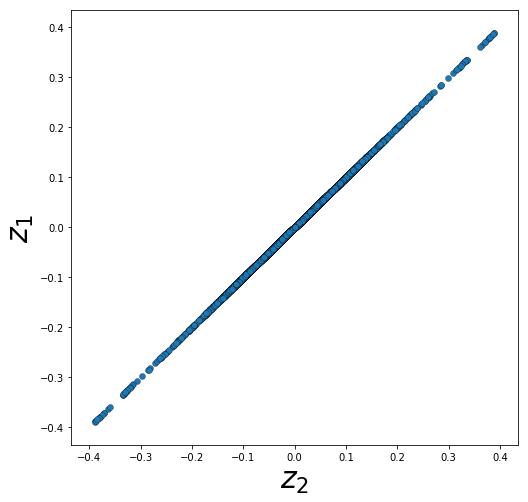

In [7]:
pfname = 'images/LRRNN_explore_T_x.png'
axlim = 2.0
xlims = [-axlim, axlim]
ylims = [-axlim, axlim]

fig = pairplot(_T_x[0], range(2), system.T_x_labels, origin=True, \
                   c=None, c_label=None, cmap=None, \
                   #xlims=xlims, ylims=ylims, \
                    fontsize=30, \
                   figsize=(8,8), pfname=pfname)



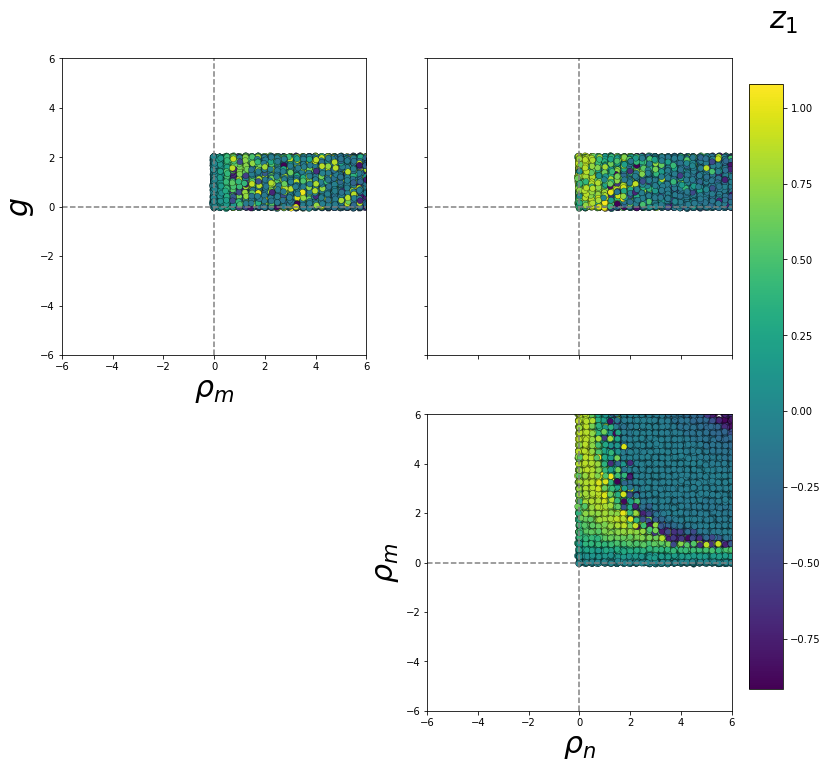

In [9]:
pfname = 'images/LRRNN_explore_z.png'
axlim = 6
xlims = [-axlim, axlim]
ylims = [-axlim, axlim]

jitter = np.random.normal(0.0, 0.025, _Z.shape)
_Z_plot = (_Z + jitter)

fig = pairplot(_Z_plot[0], range(3), system.z_labels, origin=True, \
                   c=_T_x[0,:,0], c_label=system.T_x_labels[0], cmap=None, \
                   xlims=xlims, ylims=ylims, fontsize=30, \
                   figsize=(12,12), pfname=pfname)



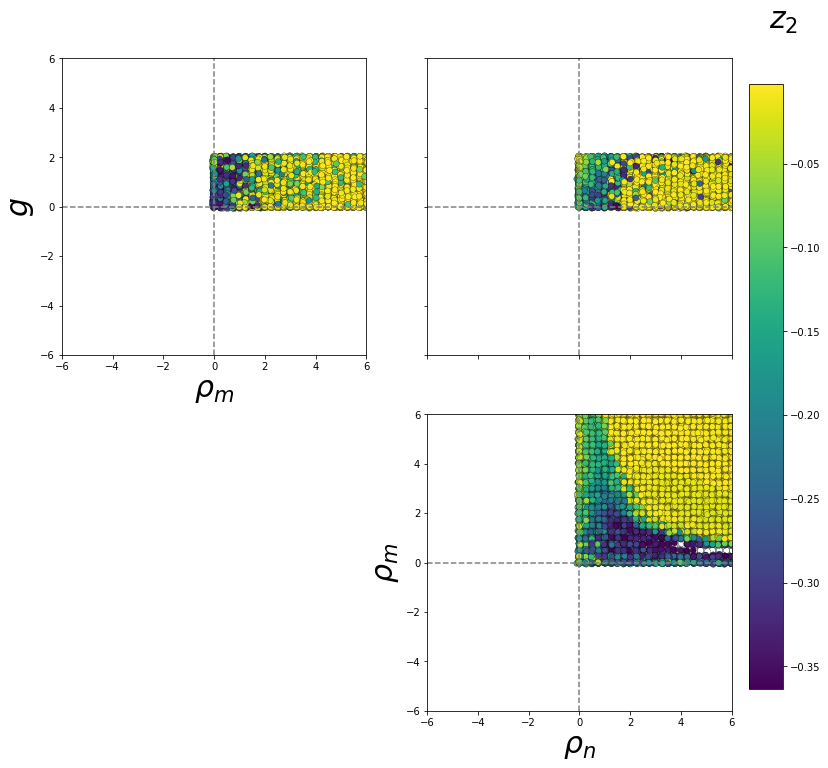

In [10]:
pfname = 'images/LRRNN_explore_z.png'
axlim = 6
xlims = [-axlim, axlim]
ylims = [-axlim, axlim]

jitter = np.random.normal(0.0, 0.025, _Z.shape)
_Z_plot = (_Z + jitter)

fig = pairplot(_Z_plot[0], range(3), system.z_labels, origin=True, \
                   c=_T_x[0,:,1], c_label=system.T_x_labels[1], cmap=None, \
                   xlims=xlims, ylims=ylims, fontsize=30, \
                   figsize=(12,12), pfname=pfname)



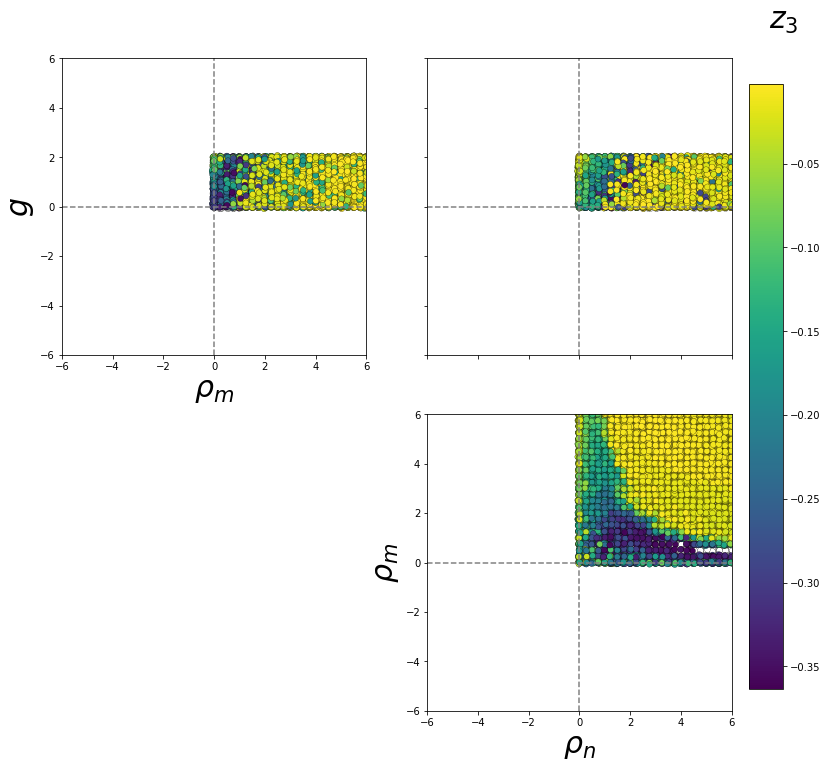

In [11]:
pfname = 'images/LRRNN_explore_z.png'
axlim = 6
xlims = [-axlim, axlim]
ylims = [-axlim, axlim]

jitter = np.random.normal(0.0, 0.025, _Z.shape)
_Z_plot = (_Z + jitter)

fig = pairplot(_Z_plot[0], range(3), system.z_labels, origin=True, \
                   c=_T_x[0,:,2], c_label=system.T_x_labels[2], cmap=None, \
                   xlims=xlims, ylims=ylims, fontsize=30, \
                   figsize=(12,12), pfname=pfname)



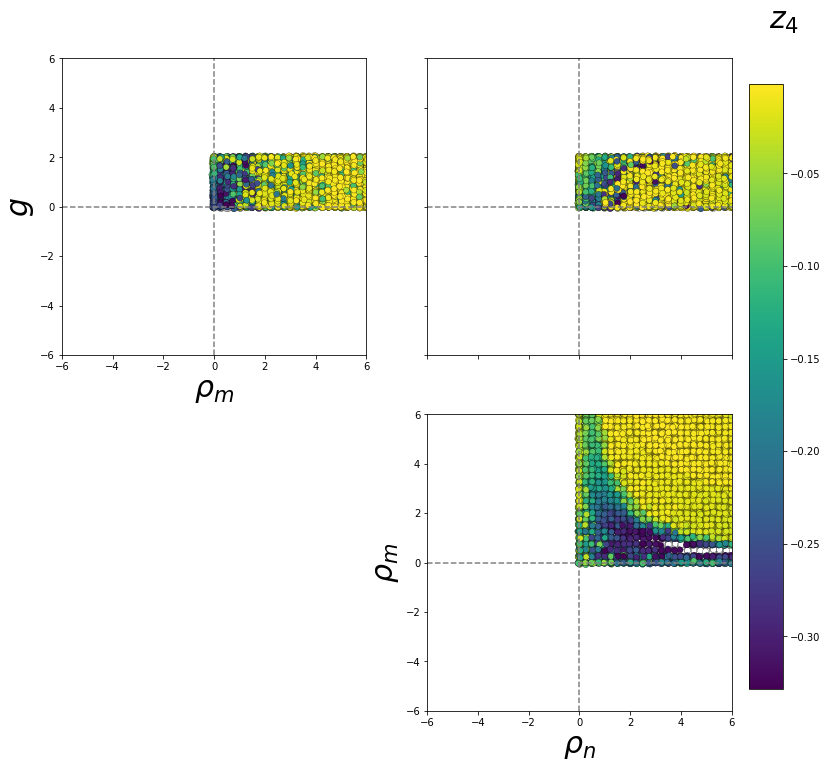

In [12]:
pfname = 'images/LRRNN_explore_z.png'
axlim = 6
xlims = [-axlim, axlim]
ylims = [-axlim, axlim]

jitter = np.random.normal(0.0, 0.025, _Z.shape)
_Z_plot = (_Z + jitter)

fig = pairplot(_Z_plot[0], range(3), system.z_labels, origin=True, \
                   c=_T_x[0,:,3], c_label=system.T_x_labels[3], cmap=None, \
                   xlims=xlims, ylims=ylims, fontsize=30, \
                   figsize=(12,12), pfname=pfname)

